## **Assignment 4 - Basics of Statistics - 2**

#### Problem Statement : Hospital Patient Data Analysis

Context:

A hospital maintains patient records including admission details, department, diagnosis, doctor, and bill amount. You have two datasets: one with patient info and another with billing details. Some patients have blank bill amounts, and there are multiple rows for the same patient due to follow-ups.

Tasks:
1. Load the patient dataset and show summary with info().
2. Select only the columns relevant for billing: ['PatientID', 'Department', 'Doctor', 'BillAmount'].
3. Drop administrative columns like ['ReceptionistID', 'CheckInTime'].
4. Use groupby to find total bill amount per department.
5. Remove duplicate patient records based on PatientID.
6. Fill missing BillAmount values with the mean bill amount.
7. Merge the billing dataset with patient dataset on PatientID.
8. Concatenate an additional DataFrame that contains new patients for the current week (row-wise).
9. Concatenate new billing category columns like ['InsuranceCovered', 'FinalAmount'] (column-wise).

Expected Outcome:
* Final cleaned dataset with accurate billing info.
* All missing values handled, merged dataset across PatientID.
* Ability to perform further analytics on department-wise revenue or doctor performance.

#### **Solution:**
1. **Load the patient dataset and show summary with info().**

In [155]:
import pandas as pd
import numpy as np

data_bill = pd.read_csv('Billing_Data.csv') # Loading Billing Data
data_bill.head()

,PatientID,InsuranceCovered,FinalAmount
0,101,2000,3000
1,102,1500,3500
2,103,2500,5000
3,104,3000,3200
4,105,1000,4000


In [156]:
data_bill.info() # info for Billing Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   PatientID         5 non-null      int64
 1   InsuranceCovered  5 non-null      int64
 2   FinalAmount       5 non-null      int64
dtypes: int64(3)
memory usage: 252.0 bytes


In [157]:
data_pat = pd.read_csv('Patient_Data.csv') # Loading Patient Data
data_pat.head()

,PatientID,Name,Department,Doctor,BillAmount,ReceptionistID,CheckInTime
0,101,Alice,Cardiology,Dr. Smith,5000.0,1,2023-01-10 09:00
1,102,Bob,Neurology,Dr. John,NaN,2,2023-01-11 10:30
2,103,Charlie,Orthopedics,Dr. Lee,7500.0,1,2023-01-12 11:00
3,104,David,Cardiology,Dr. Smith,6200.0,3,2023-01-13 12:00
4,105,Eva,Dermatology,Dr. Rose,NaN,2,2023-01-14 08:45


In [158]:
data_pat.info() # info for Patient Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientID       6 non-null      int64  
 1   Name            6 non-null      object 
 2   Department      6 non-null      object 
 3   Doctor          6 non-null      object 
 4   BillAmount      4 non-null      float64
 5   ReceptionistID  6 non-null      int64  
 6   CheckInTime     6 non-null      object 
dtypes: float64(1), int64(2), object(4)
memory usage: 468.0+ bytes


##### Observation: 2 NaN Values are observed in the Bill Amount column of the Patient Data.

In [159]:
data_pat.describe() # to get the parameters for all numerical columns

,PatientID,BillAmount,ReceptionistID
count,6.000000,4.000000,6.000000
mean,102.666667,5925.000000,1.666667
std,1.632993,1192.686044,0.816497
min,101.000000,5000.000000,1.000000
25%,101.250000,5000.000000,1.000000
50%,102.500000,5600.000000,1.500000
75%,103.750000,6525.000000,2.000000
max,105.000000,7500.000000,3.000000


#### 2. **Select only the columns relevant for billing: ['PatientID', 'Department', 'Doctor', 'BillAmount'].**

In [160]:
data_pat_new = ['PatientID', 'Department', 'Doctor', 'BillAmount'] # for only selecting the column names as mentioned
data_pat2 = data_pat[data_pat_new]
data_pat2.head()

,PatientID,Department,Doctor,BillAmount
0,101,Cardiology,Dr. Smith,5000.0
1,102,Neurology,Dr. John,NaN
2,103,Orthopedics,Dr. Lee,7500.0
3,104,Cardiology,Dr. Smith,6200.0
4,105,Dermatology,Dr. Rose,NaN


##### 3. **Drop administrative columns like ['ReceptionistID', 'CheckInTime'].**

In [161]:
data_pat.head() # retreive the original data

,PatientID,Name,Department,Doctor,BillAmount,ReceptionistID,CheckInTime
0,101,Alice,Cardiology,Dr. Smith,5000.0,1,2023-01-10 09:00
1,102,Bob,Neurology,Dr. John,NaN,2,2023-01-11 10:30
2,103,Charlie,Orthopedics,Dr. Lee,7500.0,1,2023-01-12 11:00
3,104,David,Cardiology,Dr. Smith,6200.0,3,2023-01-13 12:00
4,105,Eva,Dermatology,Dr. Rose,NaN,2,2023-01-14 08:45


In [162]:
data_pat_col2 = data_pat.drop(['ReceptionistID', 'CheckInTime'], axis=1) # using drop function to select the column to be dropped.
data_pat_col2.head()

,PatientID,Name,Department,Doctor,BillAmount
0,101,Alice,Cardiology,Dr. Smith,5000.0
1,102,Bob,Neurology,Dr. John,NaN
2,103,Charlie,Orthopedics,Dr. Lee,7500.0
3,104,David,Cardiology,Dr. Smith,6200.0
4,105,Eva,Dermatology,Dr. Rose,NaN


##### 4. **Use groupby to find total bill amount per department.**

In [163]:
data_pat.groupby('Department')['BillAmount'].sum() # using groupby to find the total bill amount per department

,BillAmount
Department,
Cardiology,16200.0
Dermatology,0.0
Neurology,0.0
Orthopedics,7500.0


##### Observation: We can see from the above table that the Dermatology and Neurology department do not show any value since there are NaN value in the data.

#### **5. Remove duplicate patient records based on PatientID.**

In [164]:
data_pat_col2 # Here we can see 101 Patient ID is repeated 2 times.

,PatientID,Name,Department,Doctor,BillAmount
0,101,Alice,Cardiology,Dr. Smith,5000.0
1,102,Bob,Neurology,Dr. John,NaN
2,103,Charlie,Orthopedics,Dr. Lee,7500.0
3,104,David,Cardiology,Dr. Smith,6200.0
4,105,Eva,Dermatology,Dr. Rose,NaN
5,101,Alice,Cardiology,Dr. Smith,5000.0


In [165]:
data_pat_new=data_pat_col2.drop_duplicates() # this function helps to remove the duplicate value and we can see 101 is not repeated
data_pat_new

,PatientID,Name,Department,Doctor,BillAmount
0,101,Alice,Cardiology,Dr. Smith,5000.0
1,102,Bob,Neurology,Dr. John,NaN
2,103,Charlie,Orthopedics,Dr. Lee,7500.0
3,104,David,Cardiology,Dr. Smith,6200.0
4,105,Eva,Dermatology,Dr. Rose,NaN


##### **6. Fill missing BillAmount values with the mean bill amount.**

In [166]:
data=data_pat_col2['BillAmount'] = data_pat_col2['BillAmount'].fillna(data_pat_col2['BillAmount'].mean())
data=data_pat_col2.drop_duplicates()
data

,PatientID,Name,Department,Doctor,BillAmount
0,101,Alice,Cardiology,Dr. Smith,5000.0
1,102,Bob,Neurology,Dr. John,5925.0
2,103,Charlie,Orthopedics,Dr. Lee,7500.0
3,104,David,Cardiology,Dr. Smith,6200.0
4,105,Eva,Dermatology,Dr. Rose,5925.0


In [167]:
data_pat['BillAmount'].mean() # Mean Value for Bill Amount (to cross-verify) from the original data

np.float64(5925.0)

##### **7. Merge the billing dataset with patient dataset on PatientID.**

In [168]:
merged_data = pd.merge(data, data_bill, on='PatientID') # to merge 2 different data sets using pandas and select which column to be kept common/Unique.
display(merged_data)

,PatientID,Name,Department,Doctor,BillAmount,InsuranceCovered,FinalAmount
0,101,Alice,Cardiology,Dr. Smith,5000.0,2000,3000
1,102,Bob,Neurology,Dr. John,5925.0,1500,3500
2,103,Charlie,Orthopedics,Dr. Lee,7500.0,2500,5000
3,104,David,Cardiology,Dr. Smith,6200.0,3000,3200
4,105,Eva,Dermatology,Dr. Rose,5925.0,1000,4000


##### **8. Concatenate an additional DataFrame that contains new patients for the current week (row-wise).**

In [170]:
new_patients_data = {
    'PatientID': [106, 107],
    'Name': ['Frank', 'Grace'],
    'Department': ['Pediatrics', 'Oncology'],
    'Doctor': ['Dr. Adams', 'Dr. Green'],
    'BillAmount': [4000.0, 9000.0],


}
new_patients_df = pd.DataFrame(new_patients_data)

new_patients_df # all the data frame added for new_patient_data.

,PatientID,Name,Department,Doctor,BillAmount
0,106,Frank,Pediatrics,Dr. Adams,4000.0
1,107,Grace,Oncology,Dr. Green,9000.0


In [172]:
concatenated_data = pd.concat([data, new_patients_df], ignore_index=True)
display(concatenated_data)

,PatientID,Name,Department,Doctor,BillAmount
0,101,Alice,Cardiology,Dr. Smith,5000.0
1,102,Bob,Neurology,Dr. John,5925.0
2,103,Charlie,Orthopedics,Dr. Lee,7500.0
3,104,David,Cardiology,Dr. Smith,6200.0
4,105,Eva,Dermatology,Dr. Rose,5925.0
5,106,Frank,Pediatrics,Dr. Adams,4000.0
6,107,Grace,Oncology,Dr. Green,9000.0


##### 9. Concatenate new billing category columns like ['InsuranceCovered', 'FinalAmount'] (column-wise).

In [147]:
new_bill_data = {
    'PatientID': [106, 107],
    'InsuranceCovered': [1500, 4000],
    'FinalAmount': [2500, 5000]
}
new_bill_df = pd.DataFrame(new_bill_data)

new_bill_df

,PatientID,InsuranceCovered,FinalAmount
0,106,1500,2500
1,107,4000,5000


In [148]:
concatenated_bill_data = pd.concat([data_bill, new_bill_df], ignore_index=False)
display(concatenated_bill_data)

,PatientID,InsuranceCovered,FinalAmount
0,101,2000,3000
1,102,1500,3500
2,103,2500,5000
3,104,3000,3200
4,105,1000,4000
0,106,1500,2500
1,107,4000,5000


* Final Cleaned Dataset with accurate billing info

In [174]:
final_merged_data = pd.merge(concatenated_data, concatenated_bill_data, on='PatientID') # to merge 2 different data sets using pandas and select which column to be kept common/Unique.
display(final_merged_data)

,PatientID,Name,Department,Doctor,BillAmount,InsuranceCovered,FinalAmount
0,101,Alice,Cardiology,Dr. Smith,5000.0,2000,3000
1,102,Bob,Neurology,Dr. John,5925.0,1500,3500
2,103,Charlie,Orthopedics,Dr. Lee,7500.0,2500,5000
3,104,David,Cardiology,Dr. Smith,6200.0,3000,3200
4,105,Eva,Dermatology,Dr. Rose,5925.0,1000,4000
5,106,Frank,Pediatrics,Dr. Adams,4000.0,1500,2500
6,107,Grace,Oncology,Dr. Green,9000.0,4000,5000


•	Ability to perform further analytics on department-wise revenue or doctor performance.

In [178]:
df1=final_merged_data.groupby('Department')['BillAmount'].sum() # using groupby to find the total bill amount per department
df1

,BillAmount
Department,
Cardiology,11200.0
Dermatology,5925.0
Neurology,5925.0
Oncology,9000.0
Orthopedics,7500.0
Pediatrics,4000.0


<Axes: xlabel='Department'>

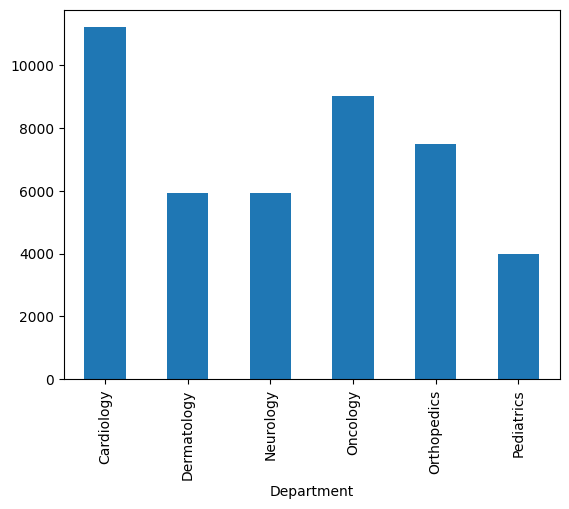

In [180]:
df1.plot(kind='bar')

#### Based on the bar chart showing department-wise revenue, we can observe the following:

* Cardiology has the tallest bar, indicating it generates the highest total bill amount.
* Oncology and Orthopedics have the next tallest bars, showing they contribute significantly to the overall revenue as well, though less than Cardiology.
* Dermatology and Neurology have bars of similar height, indicating comparable revenue for these two departments.
* Pediatrics has the shortest bar, signifying it generates the lowest total bill amount among all departments.


In summary, the bar chart provides a clear visual comparison of the revenue generated by each department, making it easy to identify the top-performing departments in terms of revenue and those that may require further attention.

In [179]:
df2=final_merged_data.groupby('Doctor')['BillAmount'].sum() # using groupby to find the total bill amount per Doctor
df2

,BillAmount
Doctor,
Dr. Adams,4000.0
Dr. Green,9000.0
Dr. John,5925.0
Dr. Lee,7500.0
Dr. Rose,5925.0
Dr. Smith,11200.0


<Axes: xlabel='Doctor'>

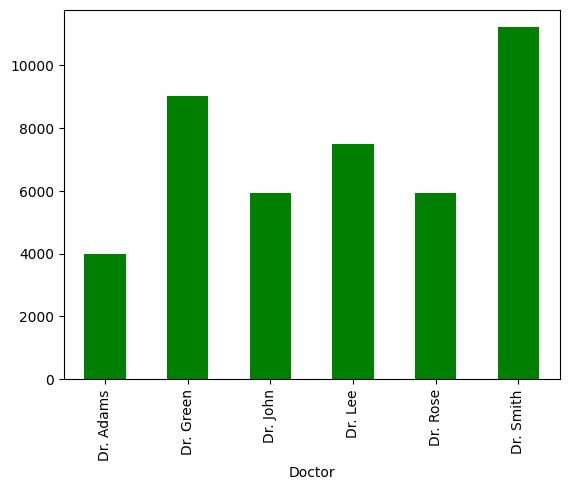

In [183]:
df2.plot(kind='bar', color='green')

Based on the bar chart showing the total bill amount per doctor, we can observe the following insights regarding doctor performance based on the total bill amount generated:

* Dr. Smith has the tallest bar, indicating that this doctor is associated with the highest total bill amount.
* Dr. Green and Dr. Lee have the next tallest bars, suggesting they also contribute significantly to the total bill amounts, although less than Dr. Smith.
* Dr. John and Dr. Rose have bars of similar height, indicating comparable total bill amounts associated with them.
* Dr. Adams has the shortest bar, signifying the lowest total bill amount among the doctors in this dataset.

It's important to note that "doctor's performance" in this context is based solely on the total bill amount. A more comprehensive evaluation of doctor performance would require considering other factors such as patient outcomes, patient satisfaction, number of procedures, etc.

However, based purely on the provided data and the total bill amount generated, this bar chart provides a clear visual comparison of the financial contribution associated with each doctor.